# MSADS 505 Applied Data Science for Business Final Project Team 2

# Analyzing Factors Affecting Loan Approval Using Predictive Modeling


## Ben Ogle, UE Wang, and Roger Qiu

https://github.com/dsklnr/Loan_Prediction/tree/main

In [1]:
# import the neede packages:

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline


import dmba
from dmba import classificationSummary, gainsChart, liftChart, stepwise_selection, regressionSummary,plotDecisionTree
from dmba.metric import AIC_score

from scipy.stats import chi2_contingency
import scipy.stats as stats
import pydotplus
import random

import warnings
warnings.filterwarnings("ignore")

no display found. Using non-interactive Agg backend


## Data Preprocessing

In [2]:
# Read the csv file
loan_df = pd.read_csv('/Users/UE/Desktop/loan_approval_dataset.csv')
display(loan_df.shape)
loan_df.head()

(4269, 13)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# List all the column names in the DataFrame
print(loan_df.columns)

# Remove leading spaces from column names
loan_df.columns = loan_df.columns.str.strip()

print(loan_df.columns)

# Remove leading spaces from values
loan_df = loan_df.applymap(lambda x: x.strip() if type(x) == str else x)

loan_df.info()

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-nul

In [4]:
# Get the total number of non null values for each column
non_nulls = loan_df.count()

# Sort the number of nun null values for each column from greatest to least
non_nulls.sort_values(ascending=False)

loan_id                     4269
no_of_dependents            4269
education                   4269
self_employed               4269
income_annum                4269
loan_amount                 4269
loan_term                   4269
cibil_score                 4269
residential_assets_value    4269
commercial_assets_value     4269
luxury_assets_value         4269
bank_asset_value            4269
loan_status                 4269
dtype: int64

In [5]:
# Get the total number of null values for each column
total_nulls = loan_df.isnull().sum()

# Sort the number of null values for each column in decsending order
total_nulls.sort_values(ascending=False)     

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### Ensure each column's values are valid. If they are not, clean them.

In [6]:
# Get all number of dependent values and the count for each level
num_of_dependents = loan_df['no_of_dependents'].value_counts()

# Sort the count of dependents in ascending order
num_of_dependents.sort_index(ascending=True)

0    712
1    697
2    708
3    727
4    752
5    673
Name: no_of_dependents, dtype: int64

In [7]:
# Get all education values and the count for each
num_of_dependents = loan_df['education'].value_counts()

# Sort the count of education types in decsending order
num_of_dependents.sort_values(ascending=False)

Graduate        2144
Not Graduate    2125
Name: education, dtype: int64

In [8]:
# Get self employment status and the count for each
num_of_dependents = loan_df['self_employed'].value_counts()

# Sort the count of self employed in decsending order
num_of_dependents.sort_index(ascending=False)

Yes    2150
No     2119
Name: self_employed, dtype: int64

In [9]:
# Get all annual income values and the count for each
num_of_dependents = loan_df['income_annum'].value_counts()

# Sort annual incomes in decsending order
num_of_dependents.sort_index(ascending=False)

9900000    35
9800000    48
9700000    40
9600000    39
9500000    40
           ..
600000     49
500000     46
400000     35
300000     51
200000     42
Name: income_annum, Length: 98, dtype: int64

In [10]:
# Get all loan amounts and the count for each
num_of_dependents = loan_df['loan_amount'].value_counts()

# Sort loan amounts types in decsending order
num_of_dependents.sort_index(ascending=False)
     

39500000     1
38800000     1
38700000     2
38500000     1
38400000     1
            ..
700000      15
600000      13
500000      16
400000       7
300000       6
Name: loan_amount, Length: 378, dtype: int64

In [11]:
# Get all loan terms and the count for each
num_of_dependents = loan_df['loan_term'].value_counts()

# Sort the count of each loan term in decsending order
num_of_dependents.sort_values(ascending=False)

6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: loan_term, dtype: int64

In [12]:
# Get all cibil scores and the count for each
num_of_dependents = loan_df['cibil_score'].value_counts()

# Sort the count of each cibil score in decsending order
num_of_dependents.sort_values(ascending=False)

348    16
538    15
543    15
778    14
509    14
       ..
334     2
773     2
893     2
484     2
864     1
Name: cibil_score, Length: 601, dtype: int64

In [13]:
# Get all residential asset values and the count for each
num_of_dependents = loan_df['residential_assets_value'].value_counts()

# Sort the count of residential asset values in decsending order
num_of_dependents.sort_values(ascending=False)

400000      66
500000      63
100000      60
1000000     57
600000      56
            ..
18900000     1
25000000     1
27400000     1
23100000     1
27300000     1
Name: residential_assets_value, Length: 278, dtype: int64

In [14]:
# Get all commercial asset values and the count for each
num_of_dependents = loan_df['commercial_assets_value'].value_counts()

# Sort the count of commercial assets values in decsending order
num_of_dependents.sort_values(ascending=False)

0           107
200000      101
100000      100
300000       90
500000       83
           ... 
19400000      1
18300000      1
17400000      1
15700000      1
18900000      1
Name: commercial_assets_value, Length: 188, dtype: int64

In [15]:
# Get all luxury asset values and the count for each
num_of_dependents = loan_df['luxury_assets_value'].value_counts()

# Sort the count of luxury asset values in decsending order
num_of_dependents.sort_values(ascending=False)

6200000     26
20400000    26
2900000     26
12300000    24
14900000    24
            ..
38000000     1
36200000     1
35000000     1
35300000     1
36700000     1
Name: luxury_assets_value, Length: 379, dtype: int64

In [16]:
# Get all bank asset values and the count for each
num_of_dependents = loan_df['bank_asset_value'].value_counts()

# Sort the count of bank asset values in decsending order
num_of_dependents.sort_values(ascending=False)

1400000     63
3600000     63
4900000     63
4500000     61
1600000     60
            ..
14600000     2
14200000     2
14400000     1
14300000     1
13700000     1
Name: bank_asset_value, Length: 146, dtype: int64

In [17]:
# Get all loan statuses and the count for each
num_of_dependents = loan_df['loan_status'].value_counts()

# Sort the count of loan statuses in decsending order
num_of_dependents.sort_values(ascending=False)

Approved    2656
Rejected    1613
Name: loan_status, dtype: int64

### Remove Outliers from Columns

In [18]:
# Create a function to remove outliers from one column in a dataframe based on iqr
def remove_outliers(column, dataframe):
  quartile1 = dataframe[column].quantile(0.25)
  quartile3 = dataframe[column].quantile(0.75)
  iqr = quartile3 - quartile1
  lower_bound = quartile1 - 1.5 * iqr
  upper_bound = quartile3 + 1.5 * iqr
  removed_outliers_df = dataframe[(dataframe[column] >= lower_bound)
          & (dataframe[column] <= upper_bound)]
  print(dataframe.shape)
  return removed_outliers_df

In [19]:
# Remove outliers from annual incomes, loan amounts, cibil scores, 
# residential asset values, commercial asset values, luxury asset values, bank asset values 
loan_df = remove_outliers("income_annum", loan_df)
loan_df = remove_outliers("loan_amount", loan_df)
loan_df = remove_outliers("cibil_score", loan_df)
loan_df = remove_outliers("residential_assets_value", loan_df)
loan_df = remove_outliers("commercial_assets_value", loan_df)
loan_df = remove_outliers("luxury_assets_value", loan_df)
loan_df = remove_outliers("bank_asset_value", loan_df)

(4269, 13)
(4269, 13)
(4269, 13)
(4269, 13)
(4217, 13)
(4182, 13)
(4182, 13)


## Exploratory Data Analysis

#### Number of Dependents

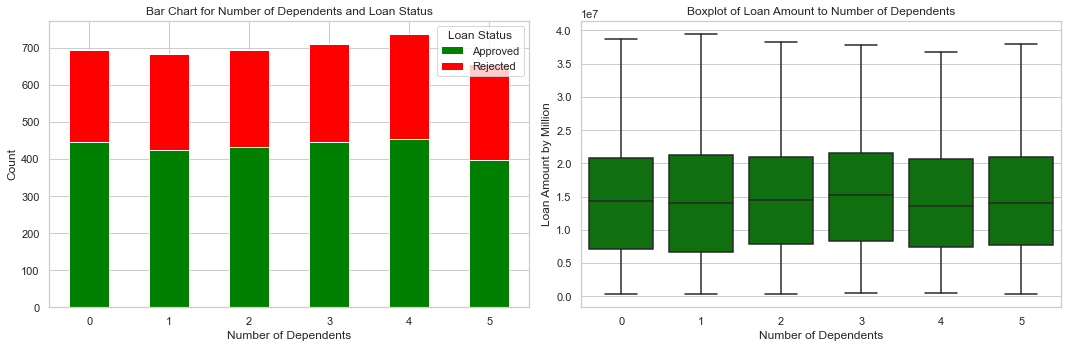

In [20]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

# Create a crosstab for number of dependents and loan status
dependent_crosstab = pd.crosstab(loan_df["no_of_dependents"], loan_df["loan_status"])

# Create boxplots for loan amount considering number of dependents
sns.set(style="whitegrid")  # Set the style for the boxplots

# Create a 1x2 grid for the two plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first chart on the left side
dependent_crosstab.plot(kind="bar", stacked=True, color=["green", "red"], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title="Loan Status")
axes[0].set_title("Bar Chart for Number of Dependents and Loan Status")
axes[0].set_xlabel("Number of Dependents")
axes[0].set_ylabel("Count")

# Plot the second chart on the right side

sns.boxplot(data=loan_df, x='no_of_dependents', y='loan_amount', color="green", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_title("Boxplot of Loan Amount to Number of Dependents")
axes[1].set_xlabel("Number of Dependents")
axes[1].set_ylabel("Loan Amount by Million")

plt.tight_layout()  # Ensure the plots do not overlap
plt.show()

#### Eduction Level

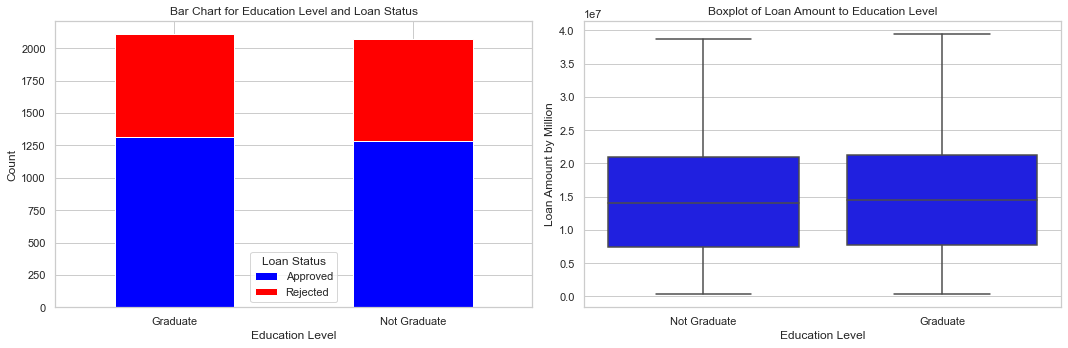

In [21]:
# Create a crosstab for education level and loan status
education_crosstab = pd.crosstab(loan_df["education"], loan_df["loan_status"])

# Create boxplots for loan amount considering education level
sns.set(style="whitegrid")  # Set the style for the boxplots

# Create a 1x2 grid for the two plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first chart on the left side
education_crosstab.plot(kind="bar", stacked=True, color=["blue", "red"], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title="Loan Status")
axes[0].set_title("Bar Chart for Education Level and Loan Status")
axes[0].set_xlabel("Education Level")
axes[0].set_ylabel("Count")

# Plot the second chart on the right side
sns.boxplot(data=loan_df, x='education', y='loan_amount', color="blue", ax=axes[1])
axes[1].set_title("Boxplot of Loan Amount to Education Level")
axes[1].set_xlabel("Education Level")
axes[1].set_ylabel("Loan Amount by Million")

plt.tight_layout()  # Ensure the plots do not overlap
plt.show()

#### Self Employment Status

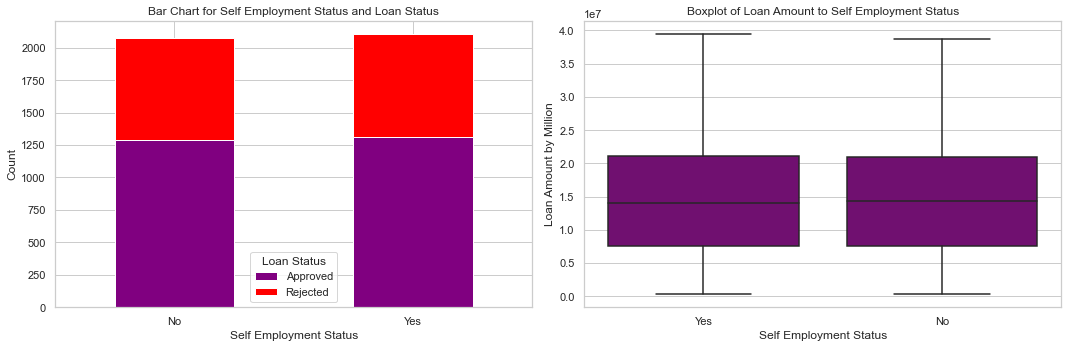

In [22]:
# Create a crosstab for self-employment status and loan status
self_employment_crosstab = pd.crosstab(loan_df["self_employed"], loan_df["loan_status"])

# Create boxplots for loan amount considering self-employment status
sns.set(style="whitegrid")  # Set the style for the boxplots

# Create a 1x2 grid for the two plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first chart on the left side
self_employment_crosstab.plot(kind="bar", stacked=True, color=["purple", "red"], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title="Loan Status")
axes[0].set_title("Bar Chart for Self Employment Status and Loan Status")
axes[0].set_xlabel("Self Employment Status")
axes[0].set_ylabel("Count")

# Plot the second chart on the right side
sns.boxplot(data=loan_df, x='self_employed', y='loan_amount', color="purple", ax=axes[1])
axes[1].set_title("Boxplot of Loan Amount to Self Employment Status")
axes[1].set_xlabel("Self Employment Status")
axes[1].set_ylabel("Loan Amount by Million")

plt.tight_layout()  # Ensure the plots do not overlap
plt.show()

#### Requested Loan Amount

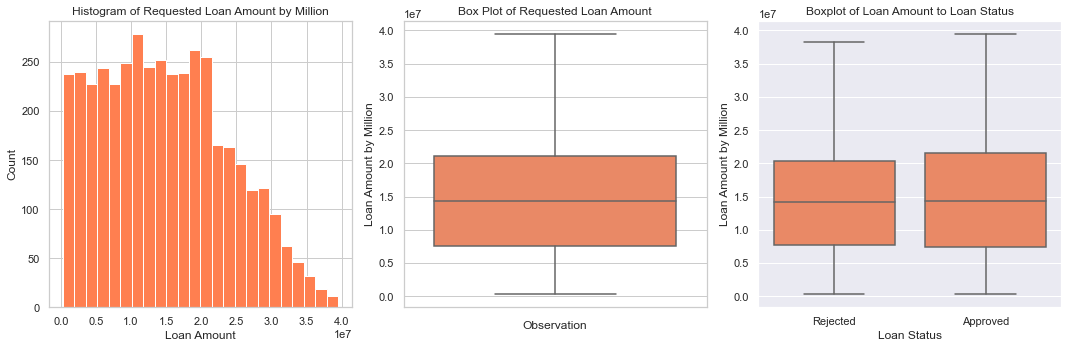

In [23]:
# Create a histogram for requested loan amount
plt.figure(figsize=(15, 5))  # Set the figure size
plt.subplot(1, 3, 1)  # Create the first subplot

plt.hist(data=loan_df, x="loan_amount", bins='auto', color="coral")
plt.title("Histogram of Requested Loan Amount by Million")
plt.xlabel("Loan Amount")
plt.ylabel("Count")

# Create a boxplot for total compensation with removed outliers
plt.subplot(1, 3, 2)  # Create the second subplot

sns.set(style='darkgrid')
sns.boxplot(y=loan_df['loan_amount'], color='coral')
plt.title("Box Plot of Requested Loan Amount")
plt.xlabel("Observation")
plt.ylabel("Loan Amount by Million")

# Create boxplots for loan status considering loan amount
plt.subplot(1, 3, 3)  # Create the third subplot

sns.boxplot(data=loan_df, x='loan_status', y='loan_amount', color="coral")
plt.title("Boxplot of Loan Amount to Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount by Million")

plt.tight_layout()  # Ensure the plots do not overlap
plt.show()

#### Annual Income

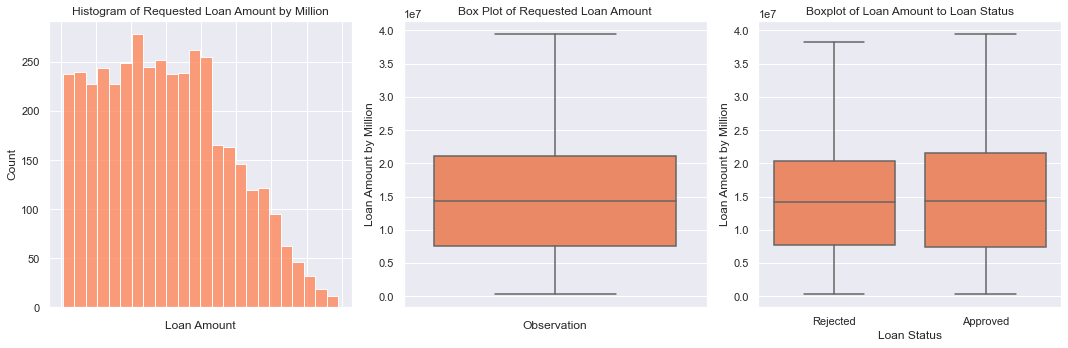

In [24]:
#Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a histogram for requested loan amount
sns.histplot(data=loan_df, x="loan_amount", bins='auto', color="coral", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Histogram of Requested Loan Amount by Million")
axes[0].set_xlabel("Loan Amount")
axes[0].set_ylabel("Count")

# Create a boxplot for total compensation with removed outliers
sns.set_style('darkgrid')
sns.boxplot(y=loan_df['loan_amount'], color='coral', ax=axes[1])
axes[1].set_title("Box Plot of Requested Loan Amount")
axes[1].set_xlabel("Observation")
axes[1].set_ylabel("Loan Amount by Million")

# Create boxplots for loan status considering loan amount
sns.boxplot(data=loan_df, x='loan_status', y='loan_amount', color="coral", ax=axes[2])
axes[2].set_title("Boxplot of Loan Amount to Loan Status")
axes[2].set_xlabel("Loan Status")
axes[2].set_ylabel("Loan Amount by Million")

plt.tight_layout()
plt.show()

#### Loan Term

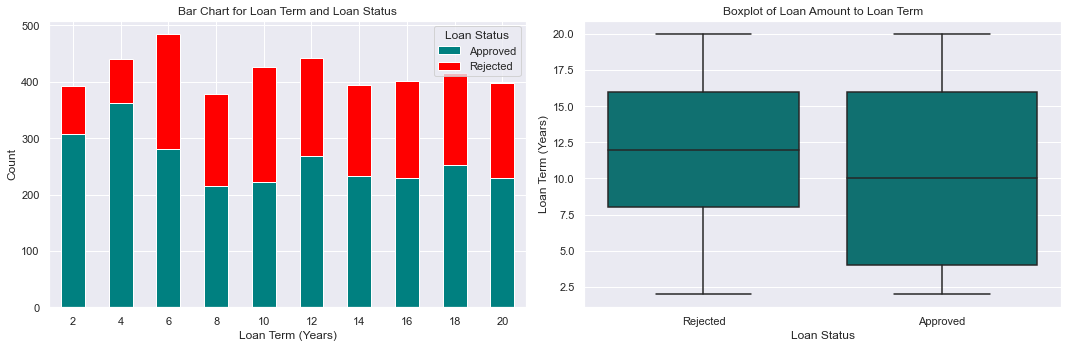

In [25]:
# Create a crosstab for self-employment status and loan status
dependent_crosstab = pd.crosstab(loan_df["loan_term"], loan_df["loan_status"])

# Create a bar chart
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
dependent_crosstab.plot(kind="bar", stacked=True, color=["teal", "red"], ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)
axs[0].legend(title="Loan Status")
axs[0].set_title("Bar Chart for Loan Term and Loan Status")
axs[0].set_xlabel("Loan Term (Years)")
axs[0].set_ylabel("Count")

# Create boxplots for loan amount considering loan term
sns.boxplot(data=loan_df, x='loan_status', y='loan_term', color="teal", ax=axs[1])
axs[1].set_title("Boxplot of Loan Amount to Loan Term")
axs[1].set_xlabel("Loan Status")
axs[1].set_ylabel("Loan Term (Years)")

plt.tight_layout()
plt.show()

#### Cibil Scores

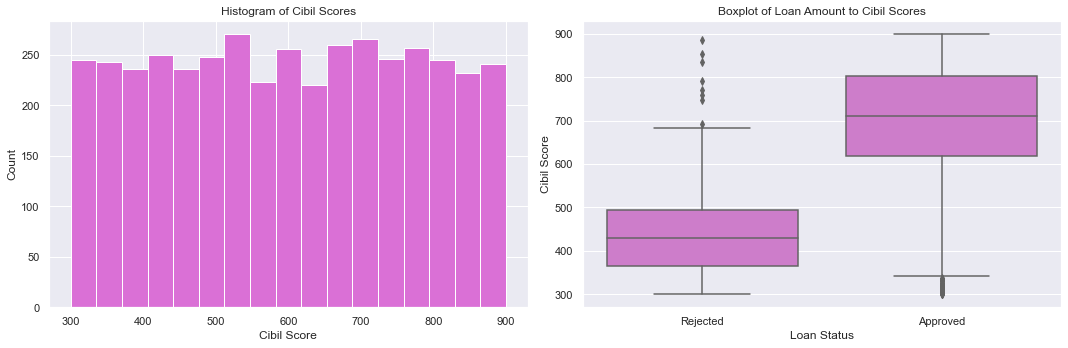

In [26]:
# Create a histogram for Cibil scores
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(data=loan_df, x="cibil_score", bins='auto', color="orchid")
plt.title("Histogram of Cibil Scores")
plt.xlabel("Cibil Score")
plt.ylabel("Count")

# Create boxplots for loan status considering Cibil scores
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_df, x='loan_status', y='cibil_score', color="orchid")
plt.title("Boxplot of Loan Amount to Cibil Scores")
plt.xlabel("Loan Status")
plt.ylabel("Cibil Score")

plt.tight_layout()
plt.show()

#### Residential Asset Values

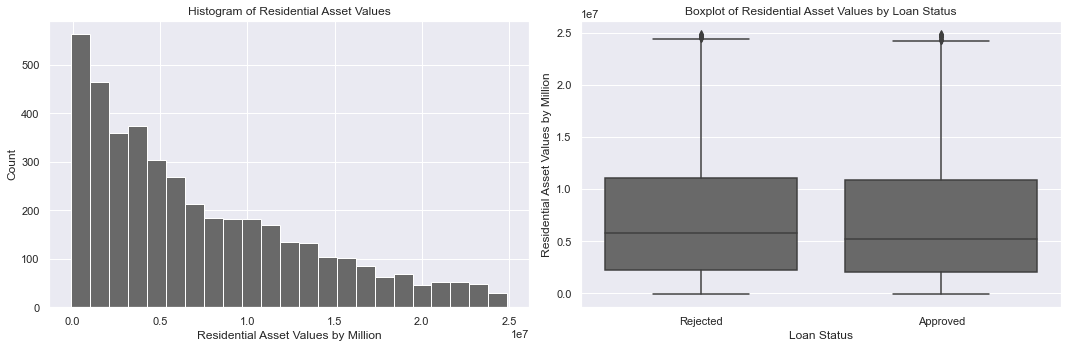

In [27]:
# Create a histogram for residential asset values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(data=loan_df, x="residential_assets_value", bins='auto', color="dimgrey")
plt.title("Histogram of Residential Asset Values")
plt.xlabel("Residential Asset Values by Million")
plt.ylabel("Count")

# Create boxplots for loan status considering residential asset values
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_df, x='loan_status', y='residential_assets_value', color="dimgrey")
plt.title("Boxplot of Residential Asset Values by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Residential Asset Values by Million")

plt.tight_layout()
plt.show()

#### Commerical Asset Values

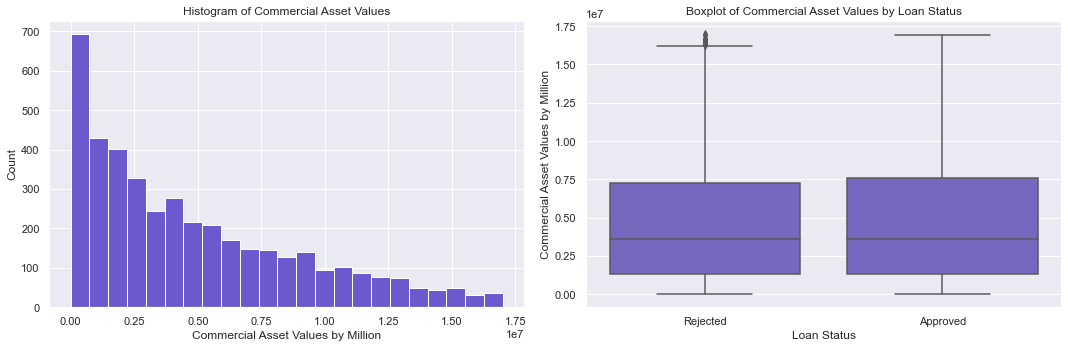

In [28]:
# Create a histogram for commercial asset values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(data=loan_df, x="commercial_assets_value", bins="auto", color="slateblue")
plt.title("Histogram of Commercial Asset Values")
plt.xlabel("Commercial Asset Values by Million")
plt.ylabel("Count")

# Create boxplots for loan status considering commercial asset values
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_df, x='loan_status', y='commercial_assets_value', color="slateblue")
plt.title("Boxplot of Commercial Asset Values by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Commercial Asset Values by Million")

plt.tight_layout()
plt.show()

#### Luxury Asset Values

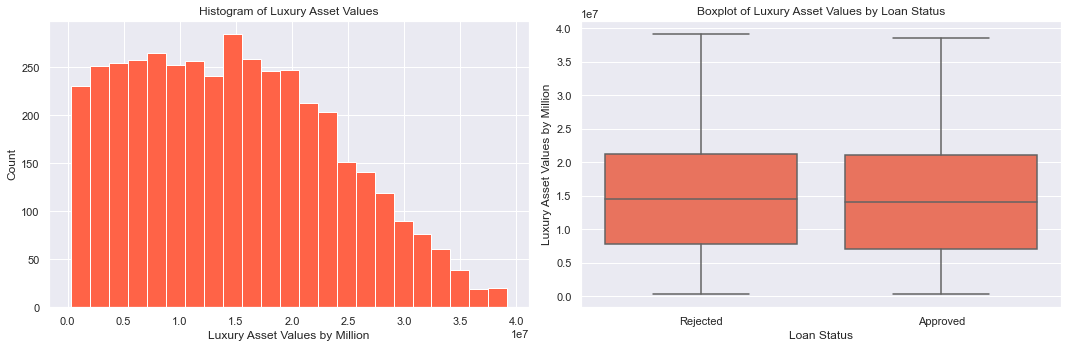

In [29]:
# Create a histogram for luxury asset values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(data=loan_df, x="luxury_assets_value", bins="auto", color="tomato")
plt.title("Histogram of Luxury Asset Values")
plt.xlabel("Luxury Asset Values by Million")
plt.ylabel("Count")

# Create boxplots for loan status considering luxury asset values
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_df, x='loan_status', y='luxury_assets_value', color="tomato")
plt.title("Boxplot of Luxury Asset Values by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Luxury Asset Values by Million")

plt.tight_layout()
plt.show()

#### Bank Asset Values

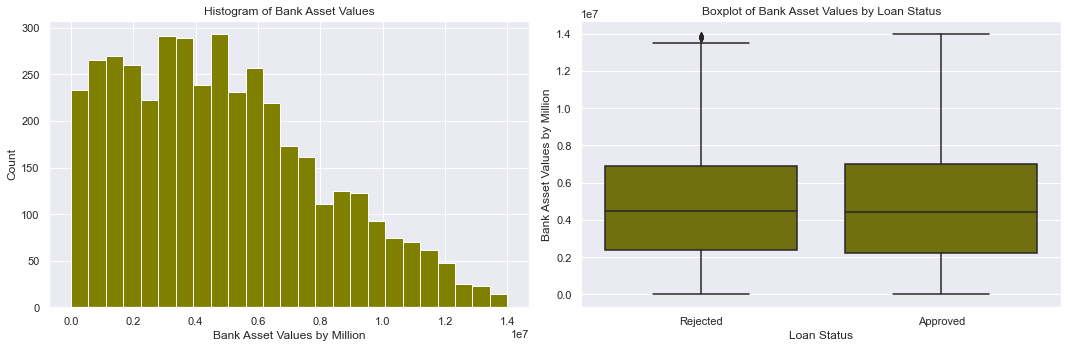

In [30]:
# Create a histogram for bank asset values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(data=loan_df, x="bank_asset_value", bins="auto", color="olive")
plt.title("Histogram of Bank Asset Values")
plt.xlabel("Bank Asset Values by Million")
plt.ylabel("Count")

# Create boxplots for loan status considering bank asset values
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_df, x='loan_status', y='bank_asset_value', color="olive")
plt.title("Boxplot of Bank Asset Values by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Bank Asset Values by Million")

plt.tight_layout()
plt.show()

In [31]:
# Create a correlation matrix with each atttribute
loan_df.corr(method='pearson')

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005884,0.013405,0.009556,0.005336,0.015991,0.023938,0.022695,0.001085,0.012257
no_of_dependents,0.005884,1.000000,0.008328,-0.005251,-0.020783,-0.010017,0.012032,-0.002042,0.003861,0.010527
income_annum,0.013405,0.008328,1.000000,0.927962,0.006938,-0.020922,0.627126,0.635076,0.929990,0.850779
loan_amount,0.009556,-0.005251,0.927962,1.000000,0.004848,-0.015739,0.591447,0.597812,0.863382,0.789859
loan_term,0.005336,-0.020783,0.006938,0.004848,1.000000,0.007863,0.002757,-0.011204,0.006588,0.013912
cibil_score,0.015991,-0.010017,-0.020922,-0.015739,0.007863,1.000000,-0.024220,0.005425,-0.025267,-0.017949
residential_assets_value,0.023938,0.012032,0.627126,0.591447,0.002757,-0.024220,1.000000,0.411741,0.586361,0.520692
commercial_assets_value,0.022695,-0.002042,0.635076,0.597812,-0.011204,0.005425,0.411741,1.000000,0.589048,0.548715
luxury_assets_value,0.001085,0.003861,0.929990,0.863382,0.006588,-0.025267,0.586361,0.589048,1.000000,0.788035
bank_asset_value,0.012257,0.010527,0.850779,0.789859,0.013912,-0.017949,0.520692,0.548715,0.788035,1.000000


In [32]:
loan_df.count()  

loan_id                     4173
no_of_dependents            4173
education                   4173
self_employed               4173
income_annum                4173
loan_amount                 4173
loan_term                   4173
cibil_score                 4173
residential_assets_value    4173
commercial_assets_value     4173
luxury_assets_value         4173
bank_asset_value            4173
loan_status                 4173
dtype: int64

#### Chi-Squared Statistics

In [33]:
# Get the categorical columns
categorical_cols = ['education', 'self_employed', 'loan_term']
p_values = []

# Create contingency tables
for categorical_attr in categorical_cols:
    contingency_table = pd.crosstab(loan_df[categorical_attr], loan_df['loan_status'])

    # Get p-values from the contingency table
    chi2, p, degrees_of_freedom, expected_freq = chi2_contingency(contingency_table)
    p_values.append(p)

# Print the p-values for the categorical variables
p_values
     

[0.8054748482812306, 0.8808544370188185, 7.685890181657574e-29]

In [34]:
# Set the significance level
alpha = 0.05

# Get the Bonferroni-corrected significance level
adjusted_alpha = alpha / len(categorical_cols)

# Get attributes with a significance level less than 0.05
significant_attributes = [(categorical_attr, p) for categorical_attr, p in zip(categorical_cols, p_values) if p < adjusted_alpha]

# Print the statistically significant categorical values
print("Statistically Significant Attributes:")
for attribute, p_val in significant_attributes:
  print(f"{attribute}'s p-value = {p_val}")
     

Statistically Significant Attributes:
loan_term's p-value = 7.685890181657574e-29


#### T-Test for Numerical Variables

In [35]:
# Get the numerical values
numerical_vals = ["no_of_dependents", "income_annum", "loan_amount", "loan_term", "cibil_score",
                  "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]

p_vals = {}

# iterate through numeric columns and find statistical significance
for attribute in numerical_vals:
  uncanceled = loan_df[loan_df['loan_status'] == 0][attribute]
  canceled = loan_df[loan_df['loan_status'] == 1][attribute]

  # Perfrom a t-test for the numerical column
  t_stat, p_val = stats.ttest_ind(uncanceled, canceled)
  if p_val < alpha:
    p_vals[attribute] = p_val
    print(f"{attribute}'s p-value is: {p_val}")

# Edge case for no statistically significant p-values from the t-test
if not p_vals:
  print("No statistically significant p-values according to the t-test")

No statistically significant p-values according to the t-test


#### One-Way ANOVA for Numerical Variables

In [36]:
# Create an empty list to store results
anova_results = []

# iterate through numeric columns and find statistical significance
for attribute in numerical_vals:
  uncanceled = loan_df[loan_df['loan_status'] == 0][attribute]
  canceled = loan_df[loan_df['loan_status'] == 1][attribute]

  # Perform one-way ANOVA
  f_statistic, p_val = stats.f_oneway(uncanceled, canceled)

  # Determine statistical significance
  if p_val < alpha:
    print(f"{attribute}'s p-value is: {p_val}")

# Edge case for no statistically significant p-values from one-way ANOVA
if not anova_results:
  print("No statistically significant p-values according to the one-way ANOVA test")

No statistically significant p-values according to the one-way ANOVA test


## Data Processing and Modeling, Part 1

In [37]:
loan_df = loan_df.reset_index(drop=True)

In [38]:
display(loan_df['education'].value_counts())
display(loan_df['self_employed'].value_counts())

Graduate        2106
Not Graduate    2067
Name: education, dtype: int64

Yes    2102
No     2071
Name: self_employed, dtype: int64

In [39]:
# Replace values in the 'education' column
loan_df['education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
# Replace values in the 'self_employed' column
loan_df['self_employed'].replace({'Yes': 1, 'No': 0}, inplace=True)
# Replace values in the 'loan_status' column
loan_df['loan_status'].replace({'Approved': 1, 'Rejected': 0}, inplace=True)

In [40]:
display(loan_df['education'].value_counts())
display(loan_df['self_employed'].value_counts())
display(loan_df['loan_status'].value_counts())

1    2106
0    2067
Name: education, dtype: int64

1    2102
0    2071
Name: self_employed, dtype: int64

1    2599
0    1574
Name: loan_status, dtype: int64

In [41]:
# drop loan_id from the table
loan_df = loan_df.drop(['loan_id'], axis=1)
display(loan_df.head())

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
1,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
2,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
3,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
4,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0


In [42]:
print(loan_df.shape)
print(loan_df.info())

(4173, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4173 non-null   int64
 1   education                 4173 non-null   int64
 2   self_employed             4173 non-null   int64
 3   income_annum              4173 non-null   int64
 4   loan_amount               4173 non-null   int64
 5   loan_term                 4173 non-null   int64
 6   cibil_score               4173 non-null   int64
 7   residential_assets_value  4173 non-null   int64
 8   commercial_assets_value   4173 non-null   int64
 9   luxury_assets_value       4173 non-null   int64
 10  bank_asset_value          4173 non-null   int64
 11  loan_status               4173 non-null   int64
dtypes: int64(12)
memory usage: 391.3 KB
None


In [43]:
# Check the zero variance variables
# Get a list of column names

columns = loan_df.columns

# Initialize a list to store columns with zero variance
zero_variance_columns = []

# Iterate through the columns and check for zero variance
for column in columns:
    std_deviation = loan_df[column].std()
    if std_deviation == 0:
        zero_variance_columns.append(column)

# Print the columns with zero variance
if zero_variance_columns:
    print("Columns with zero variance:", zero_variance_columns)
else:
    print("No columns have zero variance.")

No columns have zero variance.


In [44]:
# The loan_status is the response variable; we will change it to the category.
loan_df['loan_status'] = loan_df['loan_status'].astype('category')

In [45]:
train, valid = train_test_split(loan_df, train_size=0.7, random_state=1)
print('Training   : ', train.shape)
print('Validation : ', valid.shape)

Training   :  (2921, 12)
Validation :  (1252, 12)


In [46]:
loan_df['no_of_dependents'].value_counts()

4    736
3    711
2    694
0    693
1    682
5    657
Name: no_of_dependents, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

continuous_cols = ['no_of_dependents','income_annum', 'loan_amount', 'loan_term', 
                   'cibil_score', 'residential_assets_value','commercial_assets_value', 
                   'luxury_assets_value', 'bank_asset_value']

# Fit and transform the training data
train[continuous_cols] = scaler.fit_transform(train[continuous_cols])

# Transform the full dataset (including validation and test data)
Norm_loan_df = pd.DataFrame(scaler.transform(loan_df[continuous_cols]), columns=continuous_cols, index=loan_df.index)

# Concatenate the scaled continuous columns with the original DataFrame
Norm_loan_df = pd.concat([Norm_loan_df, loan_df.drop(continuous_cols, axis=1)], axis=1)

# Split the data into trainNorm and validNorm
trainNorm = Norm_loan_df.iloc[train.index]
validNorm = Norm_loan_df.iloc[valid.index]

print('trainNorm   : ', trainNorm.shape)
print('validNorm : ', validNorm.shape)

trainNorm   :  (2921, 12)
validNorm :  (1252, 12)


In [48]:
trainNorm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 4095 to 235
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   no_of_dependents          2921 non-null   float64 
 1   income_annum              2921 non-null   float64 
 2   loan_amount               2921 non-null   float64 
 3   loan_term                 2921 non-null   float64 
 4   cibil_score               2921 non-null   float64 
 5   residential_assets_value  2921 non-null   float64 
 6   commercial_assets_value   2921 non-null   float64 
 7   luxury_assets_value       2921 non-null   float64 
 8   bank_asset_value          2921 non-null   float64 
 9   education                 2921 non-null   int64   
 10  self_employed             2921 non-null   int64   
 11  loan_status               2921 non-null   category
dtypes: category(1), float64(9), int64(2)
memory usage: 276.8 KB


In [49]:
train_X = trainNorm.drop(columns='loan_status')
train_y = trainNorm['loan_status']

valid_X = validNorm.drop(columns='loan_status')
valid_y = validNorm['loan_status']

### Logistic Regression

In [50]:
logit = LogisticRegressionCV(penalty="l2", solver='liblinear')
logit.fit(train_X, train_y)

print('regularization', logit.C_, '\n')
print('intercept ', logit.intercept_[0], '\n')

display(pd.DataFrame({'coeff': logit.coef_[0]}, index=train_X.columns).transpose())

print('\nAIC', AIC_score(valid_y, logit.predict(valid_X), df=len(train_X.columns) + 1), '\n')

regularization [0.00599484] 

intercept  0.4672859283616046 



,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed
coeff,-0.023851,-0.080677,0.114391,-0.279177,1.57109,-0.012182,0.053349,-0.016517,-0.030426,0.166506,0.16608



AIC 254.76084419284007 



In [51]:
# Confusion matrix
print('Training Confusion Matrix:\n')
classificationSummary(train_y, logit.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, logit.predict(valid_X))

Training Confusion Matrix:

Confusion Matrix (Accuracy 0.9199)

       Prediction
Actual    0    1
     0  983  102
     1  132 1704


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9297)

       Prediction
Actual   0   1
     0 443  46
     1  42 721


In [52]:
print('Logistic Regression:\n')
valid_predictions = logit.predict(valid_X)
accuracy = accuracy_score(valid_y, valid_predictions)
precision = precision_score(valid_y, valid_predictions)
recall = recall_score(valid_y, valid_predictions)
f1 = f1_score(valid_y, valid_predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression:

Accuracy: 0.9297124600638977
Precision: 0.940026075619296
Recall: 0.944954128440367
F1-score: 0.9424836601307189


cibil_score indicates that this feature has a strong positive impact on the likelihood of loan approval, while loan_term has a negative impact.

Accuracy: The percentage of correct predictions made by the model. This model correctly predicts the outcome about 92.97% of the time.

Precision: The proportion of true positive predictions out of all positive predictions made by the model. In this validation set, it is about 94.00%.

Recall: The proportion of true positive predictions out of all actual positives. In this validation set, it's about 94.50%.

F1-score: A balance between precision and recall. In this validation set, it's approximately 94.25%.

Logistic Regression model shows good performance with high accuracy, precision, recall, and F1-score on the validation data. It seems to be effectively predicting loan approval.

### KNN

accuracy by k


,k,accuracy
0,1,0.885783
1,2,0.880990
2,3,0.909744
3,4,0.906550
4,5,0.904952
5,6,0.905751
6,7,0.908946
7,8,0.911342
8,9,0.908946
9,10,0.919329


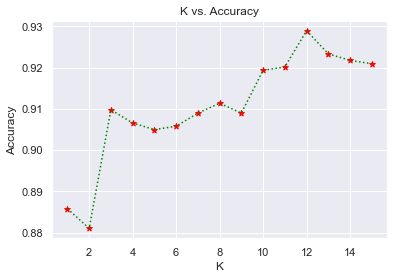

In [53]:
# Train a classifier for different values of k
results = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })
    
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print('accuracy by k')
display(results)

# show accuracy by k
plt.plot(results.k, results.accuracy, linestyle=':', c='green')
plt.title('K vs. Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

noteworthy_points = results[results['accuracy'] >= .8]
plt.scatter(noteworthy_points.k, noteworthy_points.accuracy, c='red', marker='*')

plt.show()

In [54]:
# using k=11 to re train the knn model
knn = KNeighborsClassifier(n_neighbors=12).fit(train_X, train_y)

# Classification Matrix
print('Training Confusion Matrix:\n')
classificationSummary(train_y, knn.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, knn.predict(valid_X))

print('\nAIC', AIC_score(valid_y, knn.predict(valid_X), df=len(train_X.columns) + 1), '\n')

Training Confusion Matrix:

Confusion Matrix (Accuracy 0.9288)

       Prediction
Actual    0    1
     0 1013   72
     1  136 1700


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9289)

       Prediction
Actual   0   1
     0 453  36
     1  53 710

AIC 268.90788737076446 



In [55]:
print('KNN:\n')

knn_valid_predictions = knn.predict(valid_X)
knn_accuracy = accuracy_score(valid_y, knn_valid_predictions)
knn_precision = precision_score(valid_y, knn_valid_predictions)
knn_recall = recall_score(valid_y, knn_valid_predictions)
knn_f1 = f1_score(valid_y, knn_valid_predictions)

# Print the metrics
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)

KNN:

Accuracy: 0.9289137380191693
Precision: 0.9517426273458445
Recall: 0.9305373525557011
F1-score: 0.9410205434062292


The KNN model achieves high accuracy, precision, recall, and F1-score, especially when k is set to 12. This suggests that considering 12 nearest neighbors provides the best trade-off between bias and variance in our model. 

The AIC value provides additional information on model fit, and a lower AIC is generally preferable, indicating a better model fit. In this case, the AIC is 268.90788737076446.

### Gradient Boosting

In [56]:
# GBM Model
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

# Classification Matrix
print('Training Confusion Matrix:\n')
classificationSummary(train_y, boost.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, boost.predict(valid_X))

print('\nAIC', AIC_score(valid_y, boost.predict(valid_X), df=len(train_X.columns) + 1), '\n')

Training Confusion Matrix:

Confusion Matrix (Accuracy 0.9976)

       Prediction
Actual    0    1
     0 1081    4
     1    3 1833


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9752)

       Prediction
Actual   0   1
     0 470  19
     1  12 751

AIC -1051.512867518471 



In [57]:
print('GBM:\n')

gbm_valid_predictions = boost.predict(valid_X)
gbm_accuracy = accuracy_score(valid_y, gbm_valid_predictions)
gbm_precision = precision_score(valid_y, gbm_valid_predictions)
gbm_recall = recall_score(valid_y, gbm_valid_predictions)
gbm_f1 = f1_score(valid_y, gbm_valid_predictions)

# Print the metrics
print("Accuracy:", gbm_accuracy)
print("Precision:", gbm_precision)
print("Recall:", gbm_recall)
print("F1-score:", gbm_f1)

GBM:

Accuracy: 0.9752396166134185
Precision: 0.9753246753246754
Recall: 0.9842726081258192
F1-score: 0.9797782126549249


Gradient Boosting model shows exceptional performance, especially in terms of training accuracy. While there's a slight drop in accuracy on the validation data, it still maintains a high level of performance, indicating the model's ability to generalize well to unseen data.

### Decision Tree

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 5}
Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.0005, 'min_samples_split': 9}


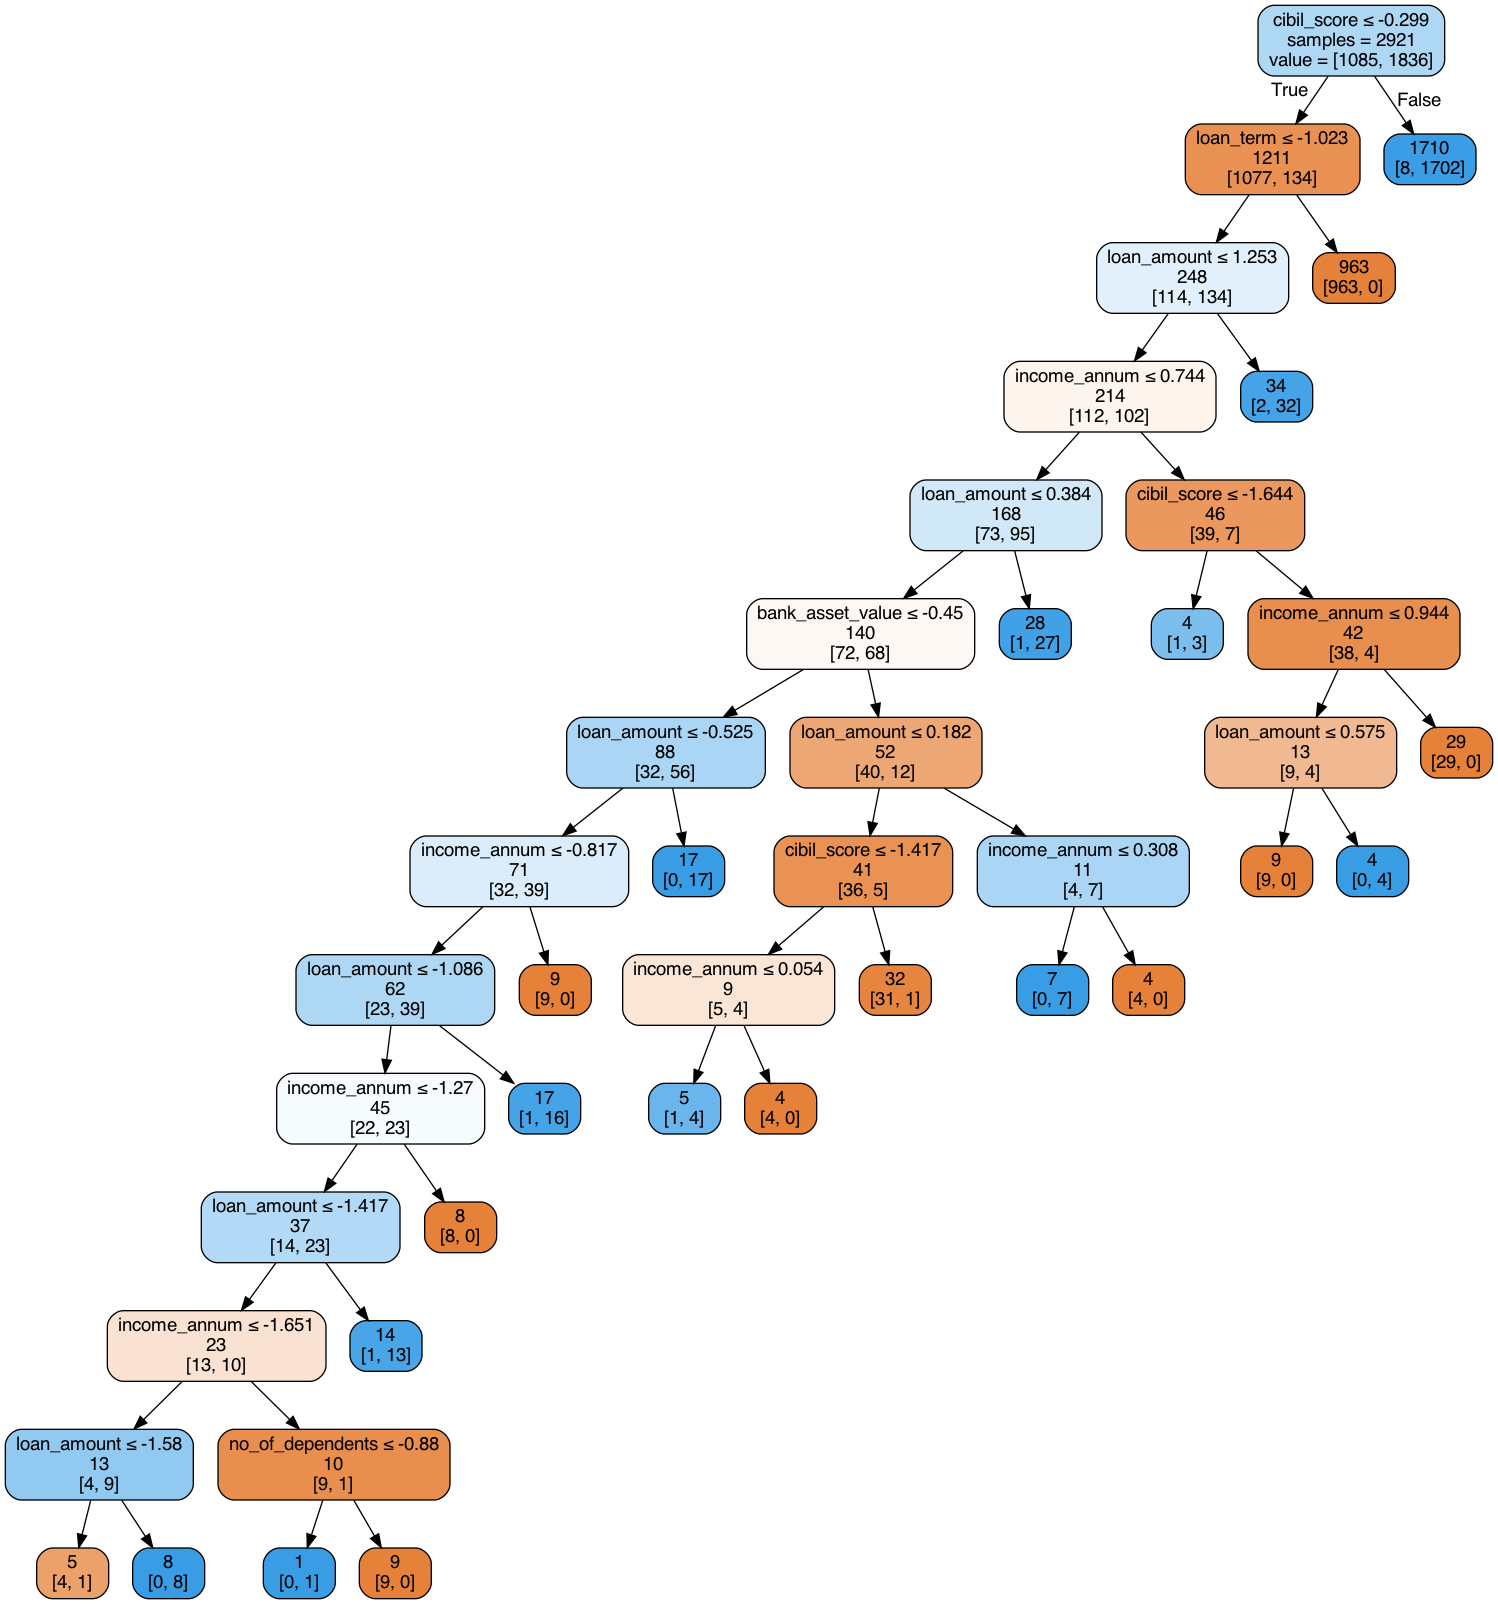

In [58]:
# user grid search to find optimized tree 
param_grid = {
                'max_depth': [5, 10, 15, 20, 25], 
                'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
                'min_samples_split': [5, 10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1) 
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

# use first grid search to find more optimal hyperparamters.
param_grid = {
                'max_depth': [15, 18, 20, 22, 25],
                'min_impurity_decrease': [0, 0.0005, 0.001, 0.0015, 0.002], 
                'min_samples_split': [8, 9, 10, 11, 12],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

print('Improved parameters: ', gridSearch.best_params_)

plotDecisionTree(gridSearch.best_estimator_, feature_names=train_X.columns)

In [59]:
# Confusion matrix
print('Training Confusion Matrix:\n')
classificationSummary(train_y, gridSearch.best_estimator_.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, gridSearch.best_estimator_.predict(valid_X))

print('\nAIC', AIC_score(valid_y, gridSearch.predict(valid_X), df=len(train_X.columns) + 1), '\n')

Training Confusion Matrix:

Confusion Matrix (Accuracy 0.9942)

       Prediction
Actual    0    1
     0 1070   15
     1    2 1834


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9784)

       Prediction
Actual   0   1
     0 470  19
     1   8 755

AIC -1224.4770912964545 



In [60]:
print('Decision Tree:\n')

best_decision_tree = gridSearch.best_estimator_
decision_tree_valid_predictions = best_decision_tree.predict(valid_X)
dt_accuracy = accuracy_score(valid_y, decision_tree_valid_predictions)
dt_precision = precision_score(valid_y, decision_tree_valid_predictions)
dt_recall = recall_score(valid_y, decision_tree_valid_predictions)
dt_f1 = f1_score(valid_y, decision_tree_valid_predictions)

# Print the metrics
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

Decision Tree:

Accuracy: 0.9784345047923323
Precision: 0.975452196382429
Recall: 0.9895150720838795
F1-score: 0.9824333116460638


"The Decision Tree model, especially with the improved parameters, demonstrates outstanding performance. It exhibits high accuracy, precision, recall, and F1-score on both the training and validation sets. The lower AIC value suggests a better model fit.

One notable feature of Decision Trees is their interpretability and ease of understanding, making them a valuable choice for decision support. In this particular case, the decision tree employs the 'cibil_score' as the primary node for splitting. If 'cibil_score' is less than or equal to 0.2999, the model continues to the 'loan' node.

### Model Comparison

Text(0.5, 1.0, 'Cumulative Gains Chart - Validation Data Results')

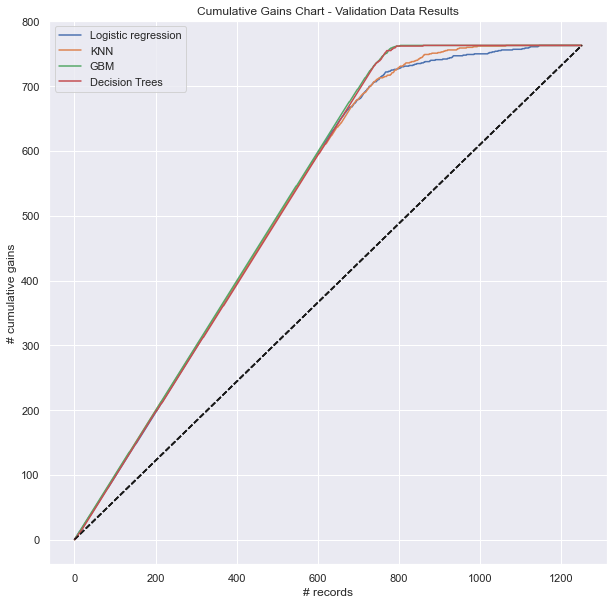

In [61]:
# Logistic regression

lg_proba =  logit.predict_proba(valid_X)
lg_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in lg_proba],
                            'p(1)': [p[1] for p in lg_proba],
                            'predicted': logit.predict(valid_X),
                          })
lg_result = lg_result.sort_values(by=['p(1)'], ascending=False)

# KNN

knn_tree_proba = knn.predict_proba(valid_X)
knn_tree_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in knn_tree_proba],
                            'p(1)': [p[1] for p in knn_tree_proba],
                            'predicted': knn.predict(valid_X),
                          })
knn_tree_result = knn_tree_result.sort_values(by=['p(1)'], ascending=False)

# Gradient Boosting

gbm_proba = boost.predict_proba(valid_X)
gbm_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in gbm_proba],
                            'p(1)': [p[1] for p in gbm_proba],
                            'predicted': boost.predict(valid_X),
                          })
gbm_result = gbm_result.sort_values(by=['p(1)'], ascending=False)
# Decision Trees

dec_tree_proba = gridSearch.best_estimator_.predict_proba(valid_X)
dec_tree_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in dec_tree_proba],
                            'p(1)': [p[1] for p in dec_tree_proba],
                            'predicted': gridSearch.best_estimator_.predict(valid_X),
                          })
dec_tree_result = dec_tree_result.sort_values(by=['p(1)'], ascending=False)



ax = gainsChart(lg_result.actual, label='Logistic regression', color='C0', figsize=[10, 10])
ax = gainsChart(knn_tree_result.actual, label='KNN', color='C1', ax=ax)
ax = gainsChart(gbm_result.actual, label='GBM', color='C2', ax=ax)
ax = gainsChart(dec_tree_result.actual, label='Decision Trees', color='C3', ax=ax)

ax.legend()
ax.set_title('Cumulative Gains Chart - Validation Data Results')

Decision Tree model demonstrates excellent performance with a high accuracy of 97.84% on the validation set, alongside impressive precision, recall, and F1-score metrics. It maintains strong generalization capabilities, and the negative AIC value suggests a solid model fit. These results indicate that the Decision Tree is both effective and reliable for our project. Additionally, the model can be fine-tuned to balance between depth and simplicity to avoid overfitting, ensuring consistent and dependable performance across diverse datasets.

## Data Processing and Modeling, Part 2

In [62]:
# create X and y for features and labels
X = loan_df.drop('loan_status', axis=1)
y = loan_df['loan_status']

print(X.head())
print(y.head())

   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 0          0              1       4100000     12200000   
1                 3          1              0       9100000     29700000   
2                 3          1              0       8200000     30700000   
3                 5          0              1       9800000     24200000   
4                 0          1              1       4800000     13500000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0          8          417                   2700000                  2200000   
1         20          506                   7100000                  4500000   
2          8          467                  18200000                  3300000   
3         20          382                  12400000                  8200000   
4         10          319                   6800000                  8300000   

   luxury_assets_value  bank_asset_value  
0              8800

In [63]:
# split the data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2921, 11)
(1252, 11)
(2921,)
(1252,)


In [64]:
# list of binary column names to not scale
binary_columns = ['education', 'self_employed']

# seperate the binary and non-binary columns
X_train_non_binary = X_train.drop(columns=binary_columns)
X_test_non_binary = X_test.drop(columns=binary_columns)
X_train_non_binary

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
611,5,700000,2100000,14,863,100000,1200000,2700000,600000
2329,1,2800000,5900000,20,728,1000000,3200000,10300000,1400000
4100,5,2100000,4900000,12,651,2500000,2100000,6100000,1800000
2276,4,9000000,30400000,20,532,21000000,7400000,30500000,13100000
2872,1,2200000,5400000,16,641,5900000,0,4800000,1200000
...,...,...,...,...,...,...,...,...,...
3444,3,6900000,22700000,4,650,900000,13400000,15500000,6400000
466,3,3600000,8600000,8,790,5400000,5900000,9800000,5200000
3092,1,9400000,21000000,12,443,14100000,2700000,23200000,5600000
3772,0,3100000,8500000,8,614,1700000,4600000,11000000,3300000


In [65]:
scaler = StandardScaler()

# fit the scaler with training data excluding binary columns and transform both train and test data
X_train_non_binary_scaled = scaler.fit_transform(X_train_non_binary)
X_test_non_binary_scaled = scaler.transform(X_test_non_binary)
X_train_non_binary_scaled

array([[ 1.47617493, -1.5413069 , -1.42328299, ..., -0.86176382,
        -1.35138897, -1.33820762],
       [-0.8842504 , -0.77684111, -0.99486305, ..., -0.38764561,
        -0.49693776, -1.08508327],
       [ 1.47617493, -1.03166304, -1.10760514, ..., -0.64841063,
        -0.96913448, -0.95852109],
       ...,
       [-0.8842504 ,  1.62576565,  0.70754248, ..., -0.50617516,
         0.95338074,  0.24381958],
       [-1.47435673, -0.66763171, -0.70173362, ..., -0.05576286,
        -0.41823831, -0.48391293],
       [-0.8842504 ,  0.09683408, -0.39732998, ...,  0.65541446,
         0.45869846, -0.67375619]])

In [66]:
# add back the binary columns to the scaled data
X_train_scaled = np.concatenate([X_train_non_binary_scaled, X_train[binary_columns].values], axis=1)
X_test_scaled = np.concatenate([X_test_non_binary_scaled, X_test[binary_columns].values], axis=1)

# check the first 5 rows of the scaled training data
print(X_train_scaled[:5])

[[ 1.47617493 -1.5413069  -1.42328299  0.53916418  1.53241643 -1.14486106
  -0.86176382 -1.35138897 -1.33820762  1.          1.        ]
 [-0.8842504  -0.77684111 -0.99486305  1.58468215  0.74696201 -0.99923365
  -0.38764561 -0.49693776 -1.08508327  0.          1.        ]
 [ 1.47617493 -1.03166304 -1.10760514  0.19065819  0.29896208 -0.75652131
  -0.64841063 -0.96913448 -0.95852109  0.          1.        ]
 [ 0.8860686   1.48015312  1.76731812  1.58468215 -0.39340145  2.23693087
   0.60800264  1.77410361  2.61686039  1.          1.        ]
 [-0.8842504  -0.99525991 -1.0512341   0.88767017  0.24078027 -0.20637335
  -1.14623475 -1.11529061 -1.14836436  0.          1.        ]]


#### Random Forest

In [67]:
# create a random forest classifier
forest_model = RandomForestClassifier()

# train model with features and labels
forest_model.fit(X_train_scaled, y_train)

# create predictions using test data
forest_y_pred = forest_model.predict(X_test_scaled)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, forest_y_pred)

# get the accuracy score by comparing predictions to the actual test values
accuracy = accuracy_score(y_test, forest_y_pred)

print("AUC score:")
print(auc_score)

print("Accuracy score:")
print(accuracy)

AUC score:
0.973298925495454
Accuracy score:
0.9752396166134185


In [68]:
# create classification report
report = classification_report(y_test, forest_y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       483
           1       0.98      0.98      0.98       769

    accuracy                           0.98      1252
   macro avg       0.97      0.97      0.97      1252
weighted avg       0.98      0.98      0.98      1252



was correct 98% of the time it predicted the positive class. This is the amount of people that the model predicted to have aproved loans did have approvals.

Recall or sensitivity is the correctly predicted positive instances to all actual positive labels. A recall of 0.98 means that the model correctly found 98% of all actual positive approval instances. So out of all the people with approvals, the model found 98% of them.

Accuracy is .98 but AUC scores are better to get an understanding of the models trade off between true positives (recall) and false positives (1 - specificity) at each threshold.

Our AUC of .98 tells us it is a good classifier in distinguishing between positive and negative cases. The higher this score the better, an AUC of 1 is a perfect model and 0.5 is as good as a random model.

In [69]:
# create a confusion matrix
matrix = confusion_matrix(y_test, forest_y_pred)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[466  17]
 [ 14 755]]


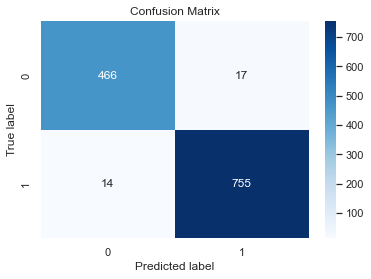

In [70]:
# create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

From the confusion matrix:

The top left is True Negatives, these are the instances were the model correctly predicted negative for approvals: 456

The top right is is the False Positives, where the model incorrectly predicted the positive class: 15

The bottom left is the False Negatives, the model incorrectly predicted the negative class: 9

The bottom right is the True Positives, these are the cases where the model correctly predicted the positive class: 801

In [71]:
# get feature importance
importance = forest_model.feature_importances_

# print important next to the column names
importance_series = pd.Series(importance, index=X_train.columns)
print(importance_series.sort_values(ascending=False))

loan_amount                 0.809628
income_annum                0.059925
self_employed               0.028136
residential_assets_value    0.019425
loan_term                   0.019102
education                   0.018737
cibil_score                 0.016519
commercial_assets_value     0.014688
no_of_dependents            0.008085
bank_asset_value            0.003269
luxury_assets_value         0.002486
dtype: float64


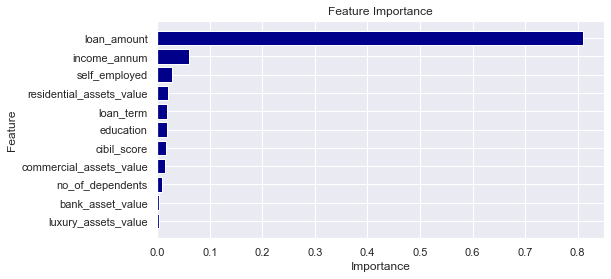

In [72]:
# sort feature importances in descending order
sorted_importances = importance_series.sort_values(ascending=False)

# create a bar plot
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
plt.barh(sorted_importances.index, sorted_importances.values, color='darkblue')

# invert y-axis so that features with highest importance are at the top
plt.gca().invert_yaxis()

# add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Here we can see how important each feature is in determining the outcome of the predictions for the random forest model.

#### Stachastic Gradient Descent

In [73]:
from sklearn.linear_model import SGDClassifier

# create a stochastic gradient descent classifier
# use logistic regression as loss function
# L2, ridge regression, helps prevent overfitting by adding a penalty term
# optimal learning rate
# 1000 epochs or loop through the dataset 1000 times
sgd_model = SGDClassifier(loss='log', penalty='l2', learning_rate='optimal', max_iter=1000, random_state=1)

# train model with features and labels
sgd_model.fit(X_train_scaled, y_train)

# create predictions using test data
sgd_y_pred = sgd_model.predict(X_test_scaled)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, sgd_y_pred)

# get the accuracy score by comparing predictions to the actual test values
accuracy = accuracy_score(y_test, sgd_y_pred)

print("AUC score:")
print(auc_score)

print("Accuracy score:")
print(accuracy)

AUC score:
0.9309675925551992
Accuracy score:
0.9289137380191693


#### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create the keras model
model = Sequential()

# adding a dense layer with 12 neurons and relu activation function, input_dim is the number of features in the input dataset
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))

# adding a second hidden layer with 8 neurons and relu activation function
model.add(Dense(8, activation='relu'))

# adding the output layer with 1 neuron since it's a binary classification problem; sigmoid activation function outputs probabilities that sum to one
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
# compiling the model with binary crossentropy loss function for binary classification; 
# adam optimizer is used for minimizing the loss function
# accuracy is chosen as a metric to evaluate the model's performance
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the training data; 
# using 10 epochs to iterate 10 times over the dataset during training, 
# and batch_size of 10 means that the model is updated after 10 data points have been processed
model.fit(X_train_scaled, y_train, epochs=10, batch_size=10)

# create predictions using test data
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, y_pred)

# get the accuracy score by comparing predictions to the actual test values
accuracy = accuracy_score(y_test, y_pred)

print("AUC score:")
print(auc_score)

print("Accuracy score:")
print(accuracy)

#### Hyperparameter tuning with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from keras.wrappers.scikit_learn import KerasClassifier

# set the models and their parameters to loop over
models = [
    ('Random Forest', RandomForestClassifier(random_state=42), X_train_scaled, X_test_scaled, {
        'n_estimators': [5, 50, 100, 500, 1000],
        'max_depth': [None, 5, 10, 15, 20, 50],
    }),
    ('SGD', SGDClassifier(random_state=42), X_train_scaled, X_test_scaled, {
        'loss': ['log'],
        'penalty': ['l2', 'l1'],
        'learning_rate': ['optimal'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
    })
]

# store the best models and their scores
best_models = {}
best_scores = {}
best_params = {}

For the parameters of:

Random Forest:

estimators: number of trees in the forest, more can be more accuracy but requires more computation and possible overfitting
depth: same as decision trees.
SGD:

loss: defines the loss function to be minimized during the optimization. In this case, 'log' is used for logistic regression, making the SGD classifier for binary.
penalty: sets the the penalization for 'l2' and 'l1'. L1 pushes less important features coefficients to zero, creating feature selection, while L2 shrinks the less important features towards zero but doesn't remove them.
learning rate: controls the step size at each iteration while moving toward a minimum of the loss function.
alpha: the amount of regularization applied, with larger values meaning more regularization.

In [ ]:
# perform Grid Search for each model, use x train and x test
# use 5 fold cross validation and then test on each generated y_train
for name, model, X_train, X_test, params in models:
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # store the best model, score, and parameters
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    best_params[name] = grid_search.best_params_

# print the best models, scores, and parameters for each
for name in best_models:
    print(f"Best {name} model: {best_models[name]}")
    print(f"Best accuracy score: {best_scores[name]}")
    print(f"Best parameters: {best_params[name]}\n")

For the 2nd grid search, the Random Forest model outperforms the SGD model in terms of accuracy with the given dataset and parameter range explored. It achieves an accuracy of about 98.13% compared to the 92.54% of the SGD model. The best parameters for this was a max depth of 20 and using 1000 trees or estimators.

Overall, based on accuracy of predictions, decision tree, with an accuracy of 98.2% is the best model to use to predict loan approvals based on the given features of the dataset.